# Applied Machine Learning (2023), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, validate and submit your solution using the nbgrader tools from the `Nbgrader/Assignment List`-menu.


# Applied Machine Learning (2022), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, download the whole notebook, using menu `File -> Download as -> Notebook (.ipynb)`. Save the file in your hard disk, and submit it in [Moodle](https://moodle.uwasa.fi) or EUNICE Moodle under the corresponding excercise.

Your solution should be an executable Python code. Use the code already existing as an example of Python programing and read more from the numerous Python programming material from the Internet if necessary. 


# Unsupervised learning, clustering

## Task 1: Apply k-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

The data-file `liver-spectroscopy.tab` is a text file which contains a Near Infrared Spectral (NIR) measurements of different cells from a liver. The file includes 731 samples, and each one has 234 variables. The variables describes the amount of infrared radiation absorbed in each of the tested 234 wavelengths. The last column in the data is the cell type, which can be one of the four types: 'collagen', 'glycogen', 'lipids' or 'DNA'. The column names are the wavelengths used in measuring the absorbtion values for the specific columns.

In [2]:
D = pd.read_table('liver-spectroscopy.tab')

# Print the classes
print(D.type.unique())

['collagen' 'glycogen' 'lipids' 'DNA']


In [3]:
types = pd.Categorical(D['type'])

In [4]:
del D['type']

In [5]:
D.head()

,1801.264,1797.407,1793.55,1789.693,1785.836,1781.979,1778.121,1774.264,1770.407,1766.55,...,937.2745,933.4174,929.5602,925.7032,921.8461,917.989,914.1319,910.2748,906.4177,902.5606
0,0.117,0.118,0.119,0.118,0.118,0.118,0.119,0.121,0.122,0.122,...,0.222,0.222,0.221,0.220,0.218,0.215,0.211,0.208,0.205,0.203
1,0.123,0.124,0.124,0.122,0.121,0.121,0.121,0.122,0.123,0.121,...,0.195,0.194,0.192,0.190,0.188,0.185,0.181,0.177,0.174,0.172
2,0.098,0.099,0.100,0.099,0.099,0.099,0.099,0.101,0.102,0.101,...,0.240,0.240,0.240,0.239,0.238,0.235,0.231,0.228,0.225,0.223
3,0.097,0.098,0.098,0.097,0.096,0.096,0.096,0.097,0.098,0.097,...,0.232,0.231,0.230,0.229,0.226,0.223,0.220,0.217,0.213,0.211
4,0.115,0.116,0.117,0.117,0.116,0.117,0.118,0.121,0.122,0.121,...,0.225,0.225,0.225,0.224,0.223,0.222,0.219,0.215,0.213,0.212


First task is to apply PCA to transform the data `D` to PCA projection `projected`. Then apply KMeans to `projected` and try to find clusters from the data. Use just enough PCA-components to contain more than 90% of the variance. Name your KMeans object as `kmeans`.

Plot the clusters using PC1 and PC2 axis using scatter plot. Use different color for each cluster in the plot.

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
pca = PCA()
projected = pca.fit_transform(D)

# Calculate the cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed to exceed 90% of the variance
n_components = np.argmax(explained_variance >= 0.90) + 1
pca = PCA(n_components=n_components)
projected = pca.fit_transform(D)

In [8]:
print(pca.explained_variance_ratio_)

[0.64024105 0.20265106 0.06353028]


In [9]:
kmeans = KMeans(n_clusters=4)

In [10]:
kmeans.fit(projected)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4)

Text(0.5, 0, 'First principal component')

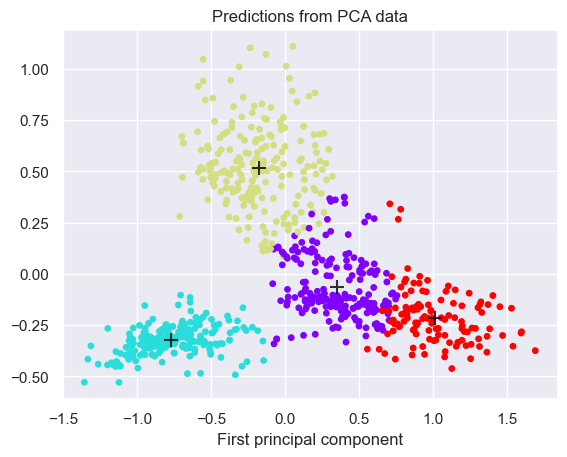

In [11]:
plt.figure()
y_kmeans = kmeans.predict(projected)
centers = kmeans.cluster_centers_
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=15, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8, marker='+')
plt.title('Predictions from PCA data')
plt.xlabel('First principal component') 

In [12]:
points=0
if (abs(kmeans.inertia_-75)<5):
    points+=1
points

1

## Task 2, apply PCA and GMM

Use previous PCA projection and apply Gaussian Mixture Model to projected data and try to find clusters from the data. Use `gmm` as a name for GaussianMixture object.

Plot the clusters with different colors in the scatter plot using PC1 and PC2 axis.

In [13]:
from sklearn.mixture import GaussianMixture

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


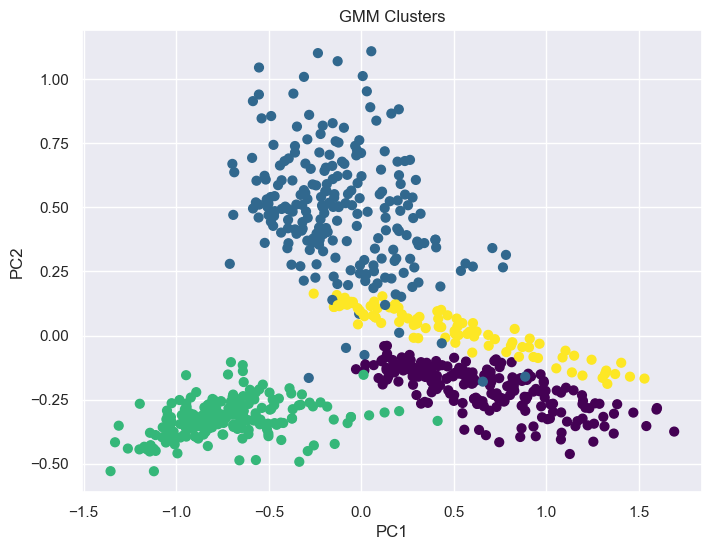

In [14]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(projected)

# Plot the clusters with different colors in the scatter plot using PC1 and PC2 axis
plt.figure(figsize=(8, 6))
plt.scatter(projected[:, 0], projected[:, 1], c=gmm.predict(projected), s=40, cmap='viridis')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GMM Clusters')
plt.show()


In [15]:
points=0
points

0

## Task 3: Confusion matrix

Calculate the confusion matrix `CM` between the clusters and true tissue types. Find from `CM`, the number of the cluster where *DNA* tissue type samples are most often assigned. Assign in variable `nDNA` the number of times the samples of tissue type *DNA* were assigned into this cluster.

Some instructions

1. Find the category number of DNA ny listing `types.categories`. The category number is the index of string 'DNA' in the list of categories.
1. Use `CM=confusion_matrix)=` -function from `sklearn.metrics` to plot the confusion matrix
1. Assign the found number in variable `nDNA`


In [16]:
category_number_DNA = types.categories.tolist().index('DNA')

In [17]:
types = pd.Categorical(types).codes

In [18]:
types

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
category_number_DNA = types.categories.tolist().index('DNA')


KeyboardInterrupt



In [21]:
category_number_DNA

0

In [22]:
CM = confusion_matrix(types, gmm.predict(projected))

In [23]:
CM

array([[ 12,   7,   0,  91],
       [192,   2,   0,   1],
       [  0,   1, 211,   0],
       [  0, 212,   0,   2]], dtype=int64)

In [24]:
nDNA_cluster = np.argmax(CM[category_number_DNA, :])
print("The number of the cluster where DNA tissue type samples are most often assigned is:", nDNA_cluster)
nDNA = CM[category_number_DNA, nDNA_cluster]
print("The number of times the samples of tissue type DNA were assigned into this cluster is:", nDNA)

The number of the cluster where DNA tissue type samples are most often assigned is: 3
The number of times the samples of tissue type DNA were assigned into this cluster is: 91


In [25]:
points=0
assert('CM' in globals()), "Define the confusion matrix as CM please!"
assert(type(CM) == np.ndarray), "Confusion matrix is not an numpy array??"
assert('nDNA' in globals()), "Assign nDNA as istructed, please"

points

0

## Task 3: The probability of the samples

The GMM model includes the function called `.predict_proba()` which returns the probability that a certain sample belongs to different clusters. Calculate the probabilities of each sample belongin to each cluster and assign the result in variable `P`. Then find out the proability that the last sample belongs in the cluster where most DNA samples belong to, and assign that probability in variable `pDNA`.

In [26]:
P = gmm.predict_proba(projected)
most_common_cluster = P.argmax(axis=1)
most_common_cluster


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [27]:
pDNA = P[len(P)-1, most_common_cluster]


In [28]:
pDNA

array([2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 2.98717491e-06,
       2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 2.98717491e-06,
       2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 2.98717491e-06,
       2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 2.98717491e-06,
       2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 2.98717491e-06,
       2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 2.98717491e-06,
       2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 2.98717491e-06,
       2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 2.98717491e-06,
       2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 4.32463318e-03,
       4.32463318e-03, 2.98717491e-06, 2.98717491e-06, 2.98717491e-06,
       2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 2.98717491e-06,
       2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 9.95672335e-01,
       2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 2.98717491e-06,
       2.98717491e-06, 2.98717491e-06, 2.98717491e-06, 2.98717491e-06,
      

In [29]:
points=0
assert('P' in globals()), "Define probabilities, P as instructed, please."
assert('pDNA' in globals()), "Define probability, pDNA as instructed, please."
points+=1
points

1

## Task 4: Evaluation

1. Which clustering method, KMeans or GMM is better for this case and why?
1. How can the quality of the clustering methods be assessed if 
    1. the true classes are known?
    1. the true classes are not known?
    
Answer by writing text or Markdown text in the cell below.

For this data set, K-means clustering works efficiently.

If the true classes are known, you can assess the quality of clustering using metrics. These metrics compare the clustering results to the truth labels and provide measures of how well the clustering method reproduces the true classes.

When the true classes are not known, evaluating clustering quality can be more challenging. In the absence of ground truth labels, it's often a good practice to use following metrics:
Silhouette Score
Davies-Bouldin Index
Within-Cluster Sum of Squares (WCSS)
Visual Inspection